<a href="https://colab.research.google.com/github/WaadAlharthi/ML_Portfolio/blob/main/DL_Assignment_2_(Image_Classification_with_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

import cv2
print(cv2.__version__)

import tensorflow as tf
print(tf.__version__)
import keras
from keras.utils import to_categorical
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, Callback


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc , roc_curve
from sklearn.metrics import recall_score

4.8.0
2.14.0


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [ ]:
from keras.datasets import fashion_mnist

(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()

In [ ]:
#Another split for the validation data
x_train, x_val, y_train, y_val = train_test_split(x_train_raw, y_train_raw, test_size=0.15, random_state=42)

In [ ]:
print("Training data shape: ", x_train.shape, " , Labels : ", y_train.shape)
print("Validation data shape: ", x_val.shape, " , Labels : ", y_val.shape)
print("Test data shape: ", x_test_raw.shape, " , Labels : ", y_test_raw.shape)

Training data shape:  (51000, 28, 28)  , Labels :  (51000,)
Validation data shape:  (9000, 28, 28)  , Labels :  (9000,)
Test data shape:  (10000, 28, 28)  , Labels :  (10000,)


**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [ ]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
y_train[0]

0

Text(0.5, 1.0, 'Ankle boot')

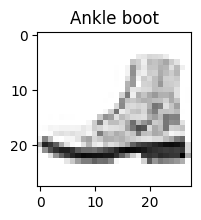

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train[1], cmap='binary')
plt.title(classes[int(y_train[1])])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [ ]:
max_value= np.array(x_train[0])
max_value.max()

255

In [ ]:
x_train_normalized = x_train / 255
x_val_normalized = x_val / 255
x_test_normalized = x_test_raw / 255

Text(0.5, 1.0, 'Ankle boot')

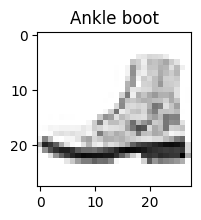

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(x_train_normalized[1], cmap='binary')
plt.title(classes[int(y_train[1])])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [ ]:
x_train.shape

(51000, 28, 28)

In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], 28, 28, 1)
x_val_reshaped = x_val_normalized.reshape(x_val_normalized.shape[0], 28, 28, 1)
x_test_reshaped = x_test_normalized.reshape(x_test_normalized.shape[0], 28, 28, 1)

In [ ]:
x_train_reshaped[0].shape

(28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [ ]:
y_train_one_hot = to_categorical(y_train, len(classes))
y_val_one_hot = to_categorical(y_val, len(classes))
y_test_one_hot = to_categorical(y_test_raw, len(classes))

In [ ]:
y_train_one_hot[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [ ]:
tf.compat.v1.reset_default_graph

model1 = Sequential()
model1.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [ ]:
# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


In [ ]:
print(model1.summary())
history1= model1.fit(x_train_reshaped,y_train_one_hot, epochs=100, validation_data= (x_val_reshaped,y_val_one_hot), verbose=0, callbacks=[early_stopping])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 17500)             0         
                                                                 
 dense (Dense)               (None, 128)               2240128   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
def plot_training_validation_accuracy(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['accuracy'], label='Training', color="green")
    plt.plot(history.history['val_accuracy'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

def plot_training_validation_loss(history):
    plt.figure(figsize=(6, 4))

    plt.plot(history.history['loss'], label='Training', color="green")
    plt.plot(history.history['val_loss'], label='Validation', color="red")

    plt.xlim(0, len(history.epoch))
    plt.ylim([0,1])

    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


def plot_heatmap(mat):
    plt.figure(figsize=(4, 4))
    sns.heatmap(mat.T, square=True, cmap="cubehelix", annot= True, fmt='d')
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

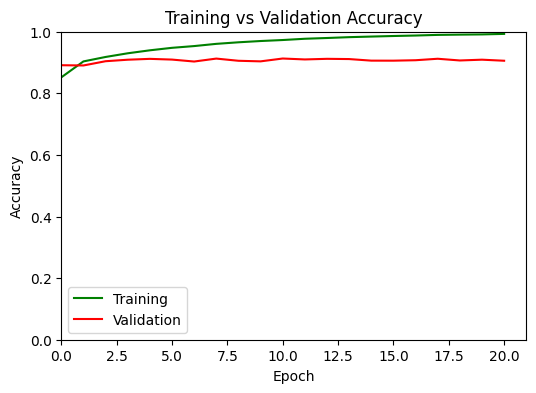

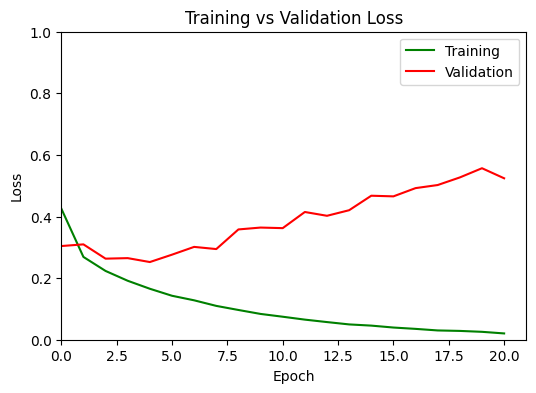

282/282 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       899
           1       0.98      0.98      0.98       906
           2       0.88      0.82      0.85       901
           3       0.90      0.91      0.90       905
           4       0.85      0.84      0.85       924
           5       0.97      0.99      0.98       916
           6       0.75      0.79      0.77       925
           7       0.95      0.96      0.95       830
           8       0.98      0.96      0.97       905
           9       0.97      0.95      0.96       889

    accuracy                           0.91      9000
   macro avg       0.91      0.91      0.91      9000
weighted avg       0.91      0.91      0.91      9000



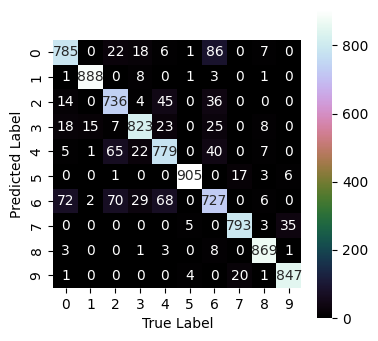

In [ ]:
### Evaluate
plot_training_validation_accuracy(history1)
plot_training_validation_loss(history1)

# Make predictions on the validation data
y_val_pred = model1.predict(x_val_reshaped)

# Convert one-hot encoded labels back to class labels
y_val_true = np.argmax(y_val_one_hot, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

confusion_mat = confusion_matrix(y_val_true, y_val_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_val_true, y_val_pred))

## Prediction

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.80      0.82      1000
           3       0.91      0.91      0.91      1000
           4       0.81      0.84      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.76      0.75      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



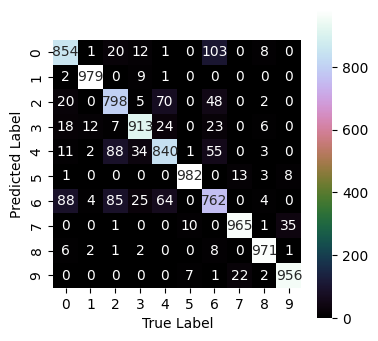

In [ ]:
# Make predictions on the validation data
y_test_pred = model1.predict(x_test_reshaped)

# Convert one-hot encoded labels back to class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_test_true, y_test_pred))

In [ ]:
# Sum along the rows (axis 0) to count each class
class_counts = np.sum(y_test_one_hot, axis=0)

# Print the count of each class
for class_index, count in enumerate(class_counts):
    print(f"Class {class_index} | {classes[class_index]}: Count = {int(count)}")

Class 0 | T-shirt/top: Count = 1000
Class 1 | Trouser: Count = 1000
Class 2 | Pullover: Count = 1000
Class 3 | Dress: Count = 1000
Class 4 | Coat: Count = 1000
Class 5 | Sandal: Count = 1000
Class 6 | Shirt: Count = 1000
Class 7 | Sneaker: Count = 1000
Class 8 | Bag: Count = 1000
Class 9 | Ankle boot: Count = 1000


The model seems to be struggling with class 6# 'Shirts'

In [ ]:
# Find mislabeled images in class 6
misclassified_shirts = np.where((y_test_true == 6) & (y_test_pred != 6))[0]
len(misclassified_shirts)

238

In [ ]:
misclassified_shirts[0]

40

Text(0.5, 1.0, 'True: 6, Predicted: 0| T-shirt/top')

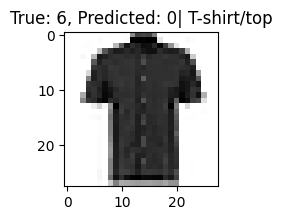

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(x_test_reshaped[misclassified_shirts[0]].reshape(28, 28), cmap='binary')
plt.title(f"True: {y_test_true[misclassified_shirts[0]]}, Predicted: {y_test_pred[misclassified_shirts[0]]}| {classes[y_test_pred[misclassified_shirts[0]]]}")

In [ ]:
len(misclassified_shirts)

238

In [ ]:
#misclassified_shirts= misclassified_shirts[1:]
len(misclassified_shirts)

237

In [ ]:
238/14

17.0

<Figure size 2400x2400 with 0 Axes>

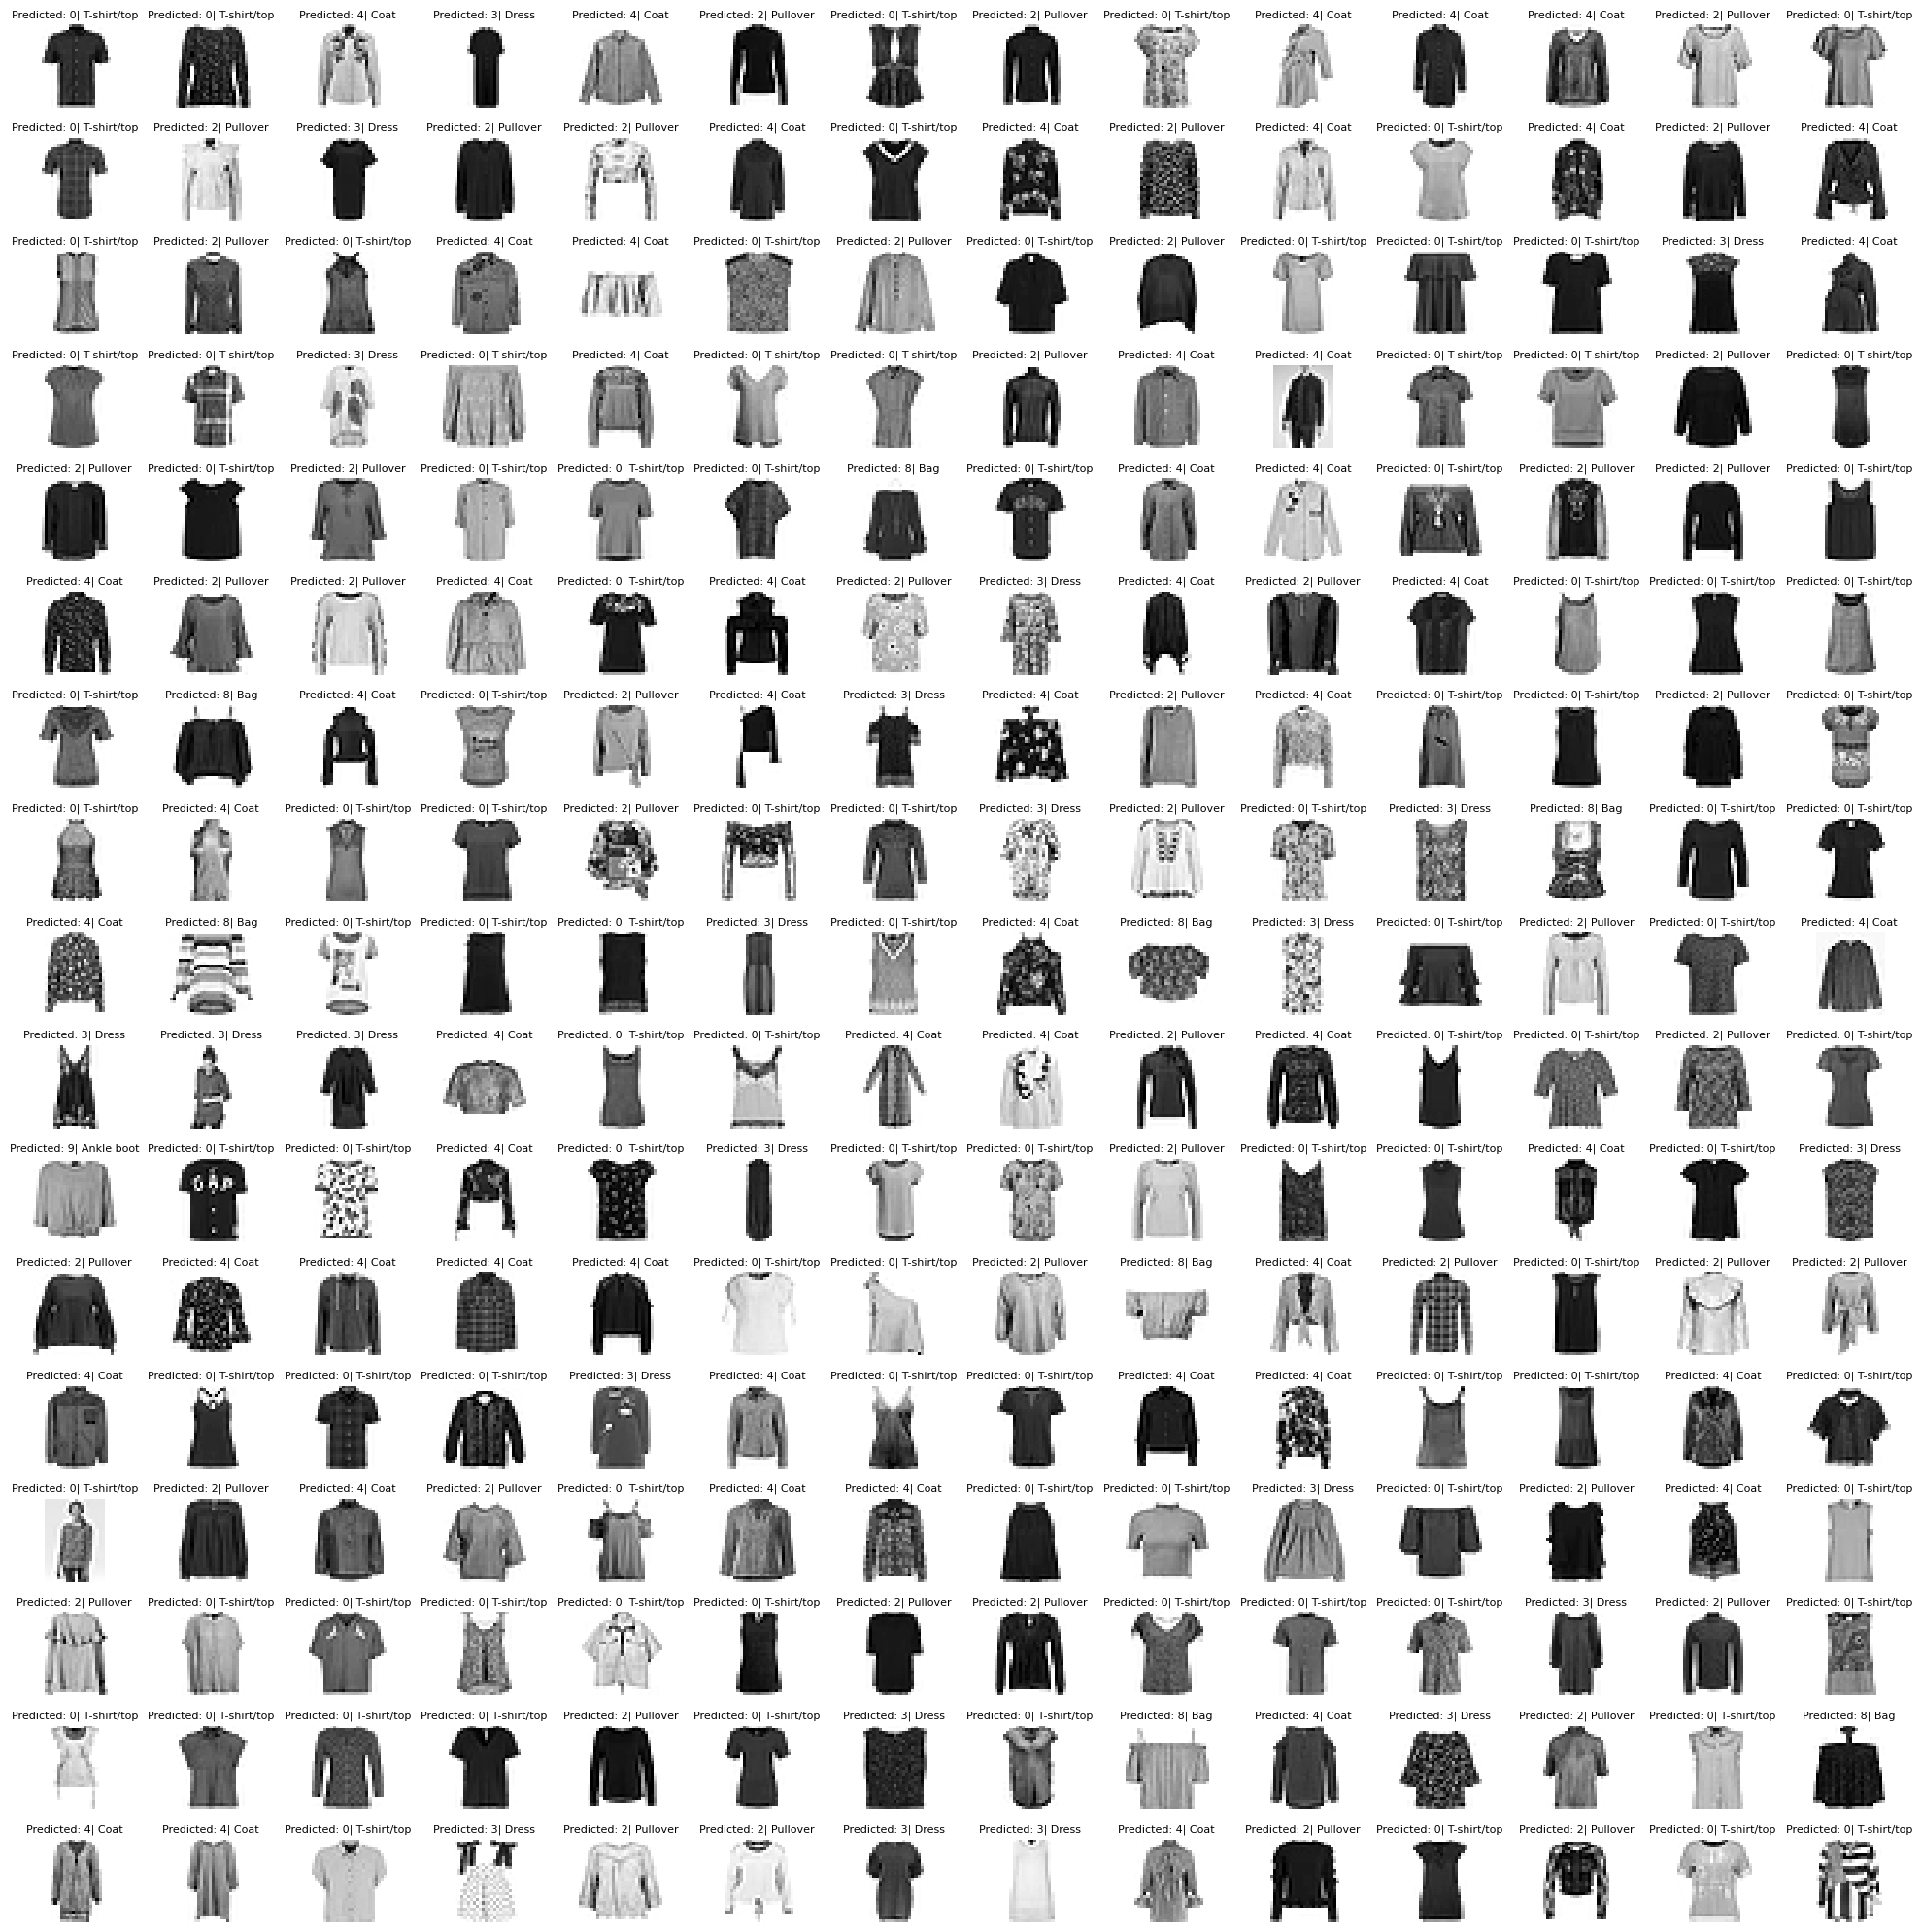

In [ ]:
# Display the misclassified shirts images
num_misclassified = len(misclassified_shirts)
plt.figure(figsize=(24, 24))
#skipped first image


num_rows = 17  # Adjust the number of rows and columns as needed
num_cols = 14
total_subplots = num_rows * num_cols


plt.figure(figsize=(20, 20))
for i in range(total_subplots):
    if i < len(x_test_reshaped):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(x_test_reshaped[misclassified_shirts[i]].reshape(28, 28), cmap='binary')
        plt.title(f"Predicted: {y_test_pred[misclassified_shirts[i]]}| {classes[y_test_pred[misclassified_shirts[i]]]}",  fontsize=8)
        plt.axis('off')

plt.tight_layout()
plt.show()


The missclassified shirts vary in style and may get easily confused with a coat, a dress, a pullover or T-shirt. Therefore, I will not be worried about class 6 recall rate.

## Second Model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 13552)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

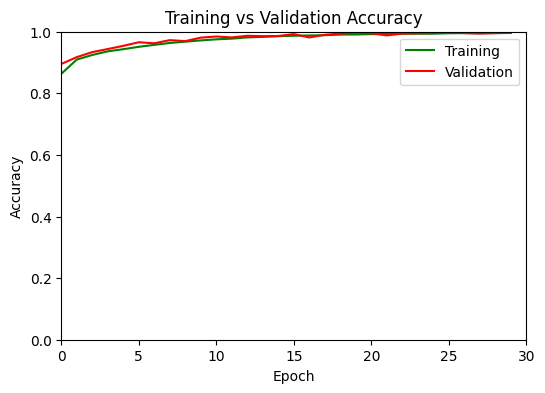

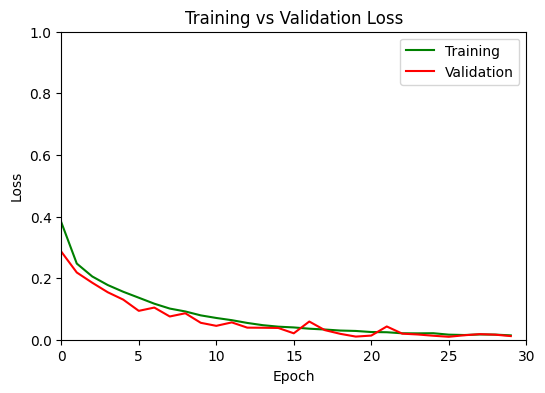

282/282 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       899
           1       1.00      1.00      1.00       906
           2       0.99      1.00      1.00       901
           3       1.00      0.99      0.99       905
           4       1.00      1.00      1.00       924
           5       1.00      1.00      1.00       916
           6       0.99      0.99      0.99       925
           7       0.99      1.00      1.00       830
           8       1.00      1.00      1.00       905
           9       1.00      0.99      1.00       889

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



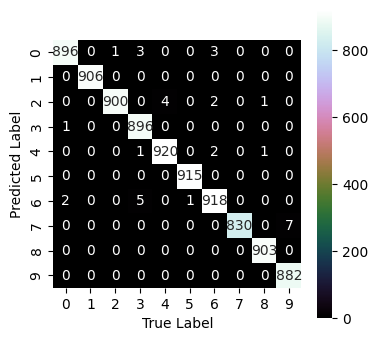

In [ ]:
tf.compat.v1.reset_default_graph

model2 = Sequential()
model2.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model2.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


print(model2.summary())
history2= model2.fit(x_train_reshaped,y_train_one_hot, epochs=100, validation_data= (x_val_reshaped,y_val_one_hot), verbose=0, callbacks=[early_stopping])


### Evaluate
plot_training_validation_accuracy(history2)
plot_training_validation_loss(history2)

# Make predictions on the validation data
y_val_pred = model2.predict(x_val_reshaped)

# Convert one-hot encoded labels back to class labels
y_val_true = np.argmax(y_val_one_hot, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

confusion_mat = confusion_matrix(y_val_true, y_val_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_val_true, y_val_pred))

313/313 [==============================] - 5s 17ms/step
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.90      0.83      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.84      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.75      0.78      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000



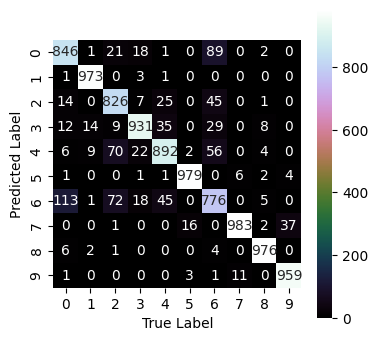

In [ ]:
# Make predictions on the validation data
y_test_pred = model2.predict(x_test_reshaped)

# Convert one-hot encoded labels back to class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_test_true, y_test_pred))

In [ ]:
# Find mislabeled images in class 6
misclassified_shirts = np.where((y_test_true == 6) & (y_test_pred != 6))[0]
len(misclassified_shirts)

224

## Third Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 25, 25, 28)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 13552)            

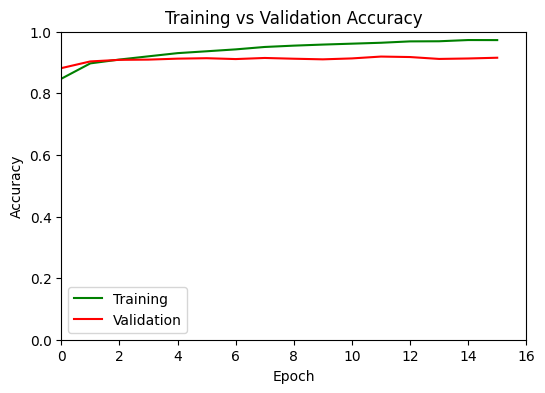

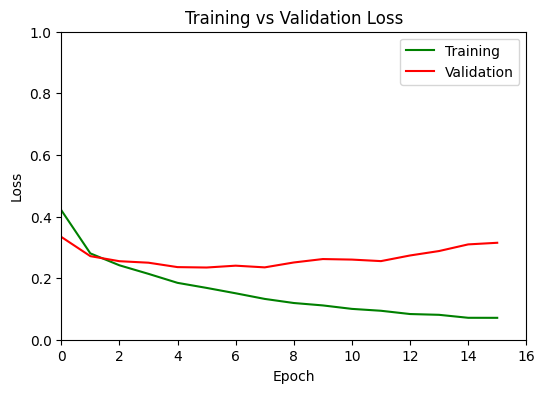

282/282 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       899
           1       0.99      0.98      0.99       906
           2       0.87      0.86      0.87       901
           3       0.93      0.92      0.92       905
           4       0.83      0.89      0.86       924
           5       0.99      0.98      0.99       916
           6       0.80      0.72      0.76       925
           7       0.95      0.97      0.96       830
           8       0.98      0.98      0.98       905
           9       0.97      0.97      0.97       889

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000



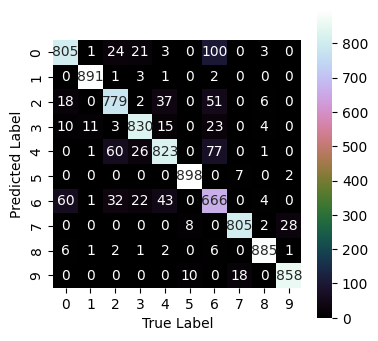

In [ ]:
tf.compat.v1.reset_default_graph

model3 = Sequential()
model3.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model3.add(Dropout(0.5))
model3.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='min',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


print(model3.summary())
history3= model3.fit(x_train_reshaped,y_train_one_hot, epochs=100, validation_data= (x_val_reshaped,y_val_one_hot), verbose=0, callbacks=[early_stopping])


### Evaluate
plot_training_validation_accuracy(history3)
plot_training_validation_loss(history3)

# Make predictions on the validation data
y_val_pred = model3.predict(x_val_reshaped)

# Convert one-hot encoded labels back to class labels
y_val_true = np.argmax(y_val_one_hot, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

confusion_mat = confusion_matrix(y_val_true, y_val_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_val_true, y_val_pred))

313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.87      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.83      0.90      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.71      0.75      1000
           7       0.96      0.98      0.97      1000
           8       0.97      0.99      0.98      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



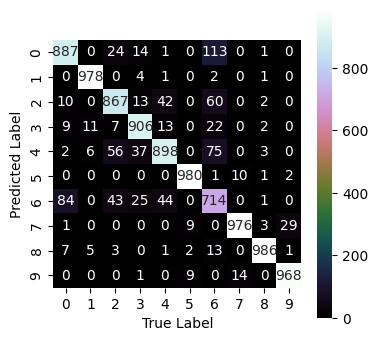

In [ ]:
# Make predictions on the validation data
y_test_pred = model3.predict(x_test_reshaped)

# Convert one-hot encoded labels back to class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_test_true, y_test_pred))

In [ ]:
# Find mislabeled images in class 6
misclassified_shirts = np.where((y_test_true == 6) & (y_test_pred != 6))[0]
len(misclassified_shirts)

286

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 25, 25, 28)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 22, 22, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 13552)            

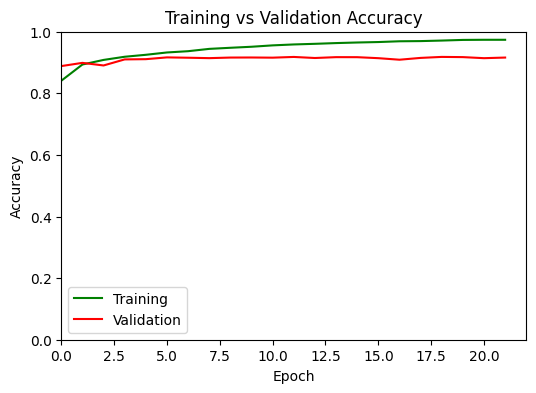

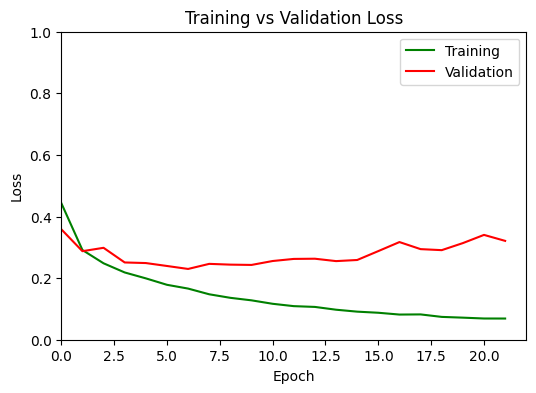

282/282 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       899
           1       0.99      0.99      0.99       906
           2       0.87      0.86      0.87       901
           3       0.91      0.92      0.92       905
           4       0.86      0.87      0.87       924
           5       0.99      0.99      0.99       916
           6       0.79      0.75      0.77       925
           7       0.96      0.97      0.96       830
           8       0.99      0.97      0.98       905
           9       0.97      0.96      0.96       889

    accuracy                           0.92      9000
   macro avg       0.92      0.92      0.92      9000
weighted avg       0.92      0.92      0.92      9000



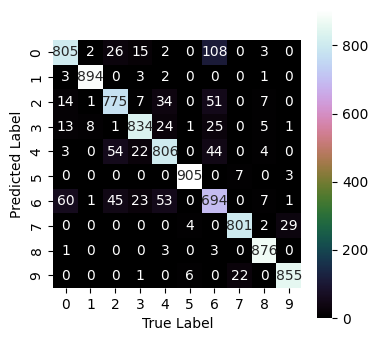

In [ ]:
tf.compat.v1.reset_default_graph

model4 = Sequential()
model4.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model4.add(Dropout(0.5))
model4.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)


print(model4.summary())
history4= model4.fit(x_train_reshaped,y_train_one_hot, epochs=100, validation_data= (x_val_reshaped,y_val_one_hot), verbose=0, callbacks=[early_stopping])


### Evaluate
plot_training_validation_accuracy(history4)
plot_training_validation_loss(history4)

# Make predictions on the validation data
y_val_pred = model4.predict(x_val_reshaped)

# Convert one-hot encoded labels back to class labels
y_val_true = np.argmax(y_val_one_hot, axis=1)
y_val_pred = np.argmax(y_val_pred, axis=1)

confusion_mat = confusion_matrix(y_val_true, y_val_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_val_true, y_val_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.87      0.87      1000
           3       0.92      0.92      0.92      1000
           4       0.87      0.88      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.74      0.76      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



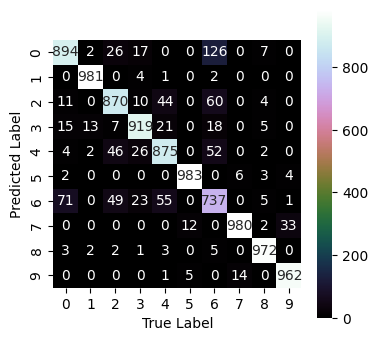

In [ ]:
# Make predictions on the validation data
y_test_pred = model4.predict(x_test_reshaped)

# Convert one-hot encoded labels back to class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_test_true, y_test_pred))

In [ ]:
# Find mislabeled images in class 6
misclassified_shirts = np.where((y_test_true == 6) & (y_test_pred != 6))[0]
len(misclassified_shirts)

263

## Best Model

In [ ]:
x_train_normalized = x_train_raw / 255
x_train_reshaped = x_train_normalized.reshape(x_train_normalized.shape[0], 28, 28, 1)

In [ ]:
y_train_one_hot = to_categorical(y_train_raw, len(classes))

In [ ]:
## retraining model 2 on the entire training data

# Define the EarlyStopping callback with multiple monitors
early_stopping = EarlyStopping(
    monitor='accuracy',  # Stop when validation accuracy doesn't improve
    min_delta=0.001,         # Minimum change to be considered an improvement
    patience=10,             # Number of epochs with no improvement after which training will be stopped
    mode='max',              # 'max' means we're looking for an increase in accuracy
    verbose=1                # Print messages when early stopping occurs
)
print(model2.summary())
history2= model2.fit(x_train_reshaped,y_train_one_hot, epochs=100, verbose=0, callbacks=[early_stopping])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 22, 22, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 13552)             0         
                                                                 
 dense_6 (Dense)             (None, 128)              

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.87      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.86      0.89      0.88      1000
           5       0.98      0.99      0.98      1000
           6       0.77      0.76      0.77      1000
           7       0.97      0.96      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



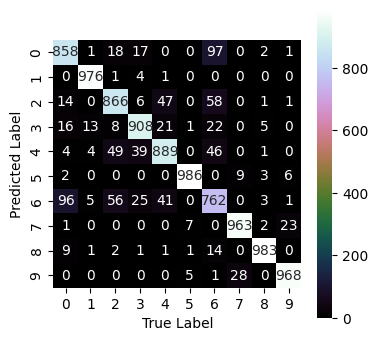

In [ ]:
# Make predictions on the test data
y_test_pred = model2.predict(x_test_reshaped)

# Convert one-hot encoded labels back to class labels
y_test_true = np.argmax(y_test_one_hot, axis=1)
y_test_pred = np.argmax(y_test_pred, axis=1)

confusion_mat = confusion_matrix(y_test_true, y_test_pred)
plot_heatmap(confusion_mat)

print(classification_report(y_test_true, y_test_pred))

In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.5 MB/s eta 0:00:00


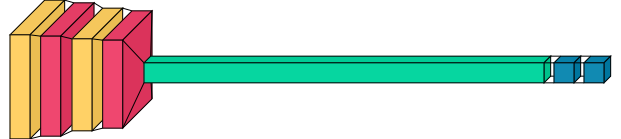

In [ ]:
import visualkeras

visualkeras.layered_view(model2)

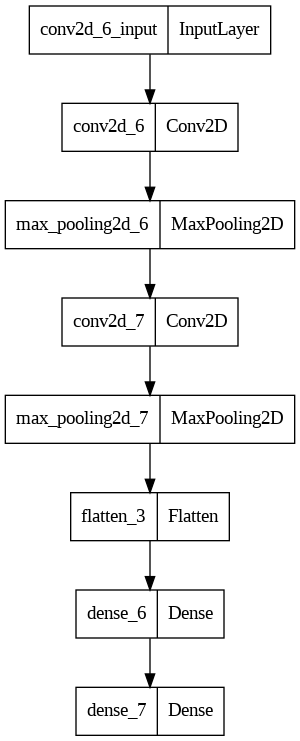

In [ ]:
from keras.utils import plot_model

plot_model(model2, to_file='final_model.png')

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___